<a href="https://colab.research.google.com/github/datecru/Predict-Future-Sales/blob/main/Predict_Future_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install libraries

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install tensorflow
!pip install seaborn

import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

load the dataset

In [3]:
from google.colab import files
uploaded = files.upload()

Saving shops.csv to shops.csv
Saving test.csv to test.csv
Saving sales_train.csv to sales_train.csv
Saving item_categories.csv to item_categories.csv
Saving items.csv to items.csv


Read the files and give a name on the program

In [4]:
df_prices = pd.read_csv('sales_train.csv')
df_shop = pd.read_csv('shops.csv')
df_categories = pd.read_csv('item_categories.csv')
df_items = pd.read_csv('items.csv')
df_test = pd.read_csv('test.csv')

Visualize the dataset

In [5]:
print(df_prices.head())
print(df_shop.head())
print(df_categories.head())
print(df_items.head())
print(df_test.head())

         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
                        shop_name  shop_id
0   !Якутск Орджоникидзе, 56 фран        0
1   !Якутск ТЦ "Центральный" фран        1
2                Адыгея ТЦ "Мега"        2
3  Балашиха ТРК "Октябрь-Киномир"        3
4        Волжский ТЦ "Волга Молл"        4
        item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3         Аксессуары - PS4                 3
4         Аксессуары - PSP                 4
                            

Convert the date on a correct format

In [6]:
df_prices['date'] = pd.to_datetime(df_prices['date'], format='%d.%m.%Y')
print(df_prices.info)

<bound method DataFrame.info of               date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0       2013-01-02               0       59    22154      999.00           1.0
1       2013-01-03               0       25     2552      899.00           1.0
2       2013-01-05               0       25     2552      899.00          -1.0
3       2013-01-06               0       25     2554     1709.05           1.0
4       2013-01-15               0       25     2555     1099.00           1.0
...            ...             ...      ...      ...         ...           ...
2935844 2015-10-10              33       25     7409      299.00           1.0
2935845 2015-10-09              33       25     7460      299.00           1.0
2935846 2015-10-14              33       25     7459      349.00           1.0
2935847 2015-10-22              33       25     7440      299.00           1.0
2935848 2015-10-03              33       25     7460      299.00           1.0

[2935849 rows x 6 c

look for a missing data a fix it and verify

In [7]:
print(df_prices.isnull().sum())
print(df_shop.isnull().sum())
print(df_categories.isnull().sum())
print(df_items.isnull().sum())


df_prices.dropna(inplace=True)
df_shop.dropna(inplace=True)
df_categories.dropna(inplace=True)
df_items.dropna(inplace=True)

print(df_prices.isnull().sum())
print(df_shop.isnull().sum())
print(df_categories.isnull().sum())
print(df_items.isnull().sum())

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64
shop_name    0
shop_id      0
dtype: int64
item_category_name    0
item_category_id      0
dtype: int64
item_name           0
item_id             0
item_category_id    0
dtype: int64
date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64
shop_name    0
shop_id      0
dtype: int64
item_category_name    0
item_category_id      0
dtype: int64
item_name           0
item_id             0
item_category_id    0
dtype: int64


take the 20% of the data to train the model

In [11]:
df_sampled = df_prices.sample(frac= 0.2, random_state=42)

X_sampled = df_sampled[['date', 'date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day']]
y_sampled = df_sampled['item_cnt_day']

print(X_sampled.head())
print(y_sampled.head())

print(df_sampled)
print(df_sampled.head())

              date  date_block_num  shop_id  item_id  item_price  item_cnt_day
2472142 2015-02-06              25       31    11208       699.0           1.0
1044690 2013-11-21              10       31    19525       149.0           1.0
2367559 2015-01-03              24       42    16169       299.0           1.0
1793501 2014-07-18              18       42     2737       199.0           1.0
1585639 2014-04-13              15        2    15229      1199.0           1.0
2472142    1.0
1044690    1.0
2367559    1.0
1793501    1.0
1585639    1.0
Name: item_cnt_day, dtype: float64
              date  date_block_num  shop_id  item_id  item_price  item_cnt_day
2472142 2015-02-06              25       31    11208       699.0           1.0
1044690 2013-11-21              10       31    19525       149.0           1.0
2367559 2015-01-03              24       42    16169       299.0           1.0
1793501 2014-07-18              18       42     2737       199.0           1.0
1585639 2014-04-13   

Split the data in to a train data and test data, using sklearn

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(469736, 6)
(117434, 6)
(469736,)
(117434,)


Normalize the data, using sklearn and StandardScaler and print the first 10 to verify

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.drop(columns=['date'], axis=1))
X_test_scaled = scaler.transform(X_test.drop(columns=['date'], axis=1))



print(X_train_scaled[:10])
print(X_test_scaled[:10])

[[-4.86144396e-01  1.60330675e+00  1.70195693e+00 -5.12483091e-01
   3.40725112e+00]
 [ 1.10484456e+00  1.54159369e+00  3.16952278e-01 -2.27754562e-01
  -1.05860172e-01]
 [-2.74012535e-01  2.45619505e-01 -1.02850342e+00  2.79485373e-03
  -1.05860172e-01]
 [ 1.74124014e+00 -6.80076344e-01  1.70195693e+00 -5.12483091e-01
   1.65069547e+00]
 [-9.10408118e-01 -1.11206774e+00  7.18611538e-01 -4.29485301e-01
  -1.05860172e-01]
 [-1.12253998e+00 -5.56650230e-01 -9.41179308e-01 -2.27466375e-01
  -1.05860172e-01]
 [ 5.74514909e-01 -3.71511061e-01  5.57709315e-02 -4.58880352e-01
  -1.05860172e-01]
 [ 7.86646769e-01  1.17131535e+00 -1.05160001e+00 -3.42741083e-01
  -1.05860172e-01]
 [-8.04342187e-01 -1.60577219e+00  3.82445359e-01 -2.85391916e-01
  -1.05860172e-01]
 [ 1.50251187e-01  6.15897844e-01 -4.92852272e-01  8.67355164e-01
  -1.05860172e-01]]
[[-0.06188067 -0.12465883  0.6285981  -0.34302927 -0.10586017]
 [-1.01647405  1.29474147 -1.38934815 -0.14129853 -0.10586017]
 [-0.69827626  1.109602

Create the model using tensor flow with and optimizer Adam and regularization L2

In [20]:
from tensorflow.keras.regularizers import l2

def create_model(input_dim):
  model = Sequential()

  model.add(Dense(64, activation='relu', input_dim=input_dim, kernel_regularizer=l2(0.01)))
  model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
  model.add(Dense(1, activation='linear'))

  optimizer = Adam(learning_rate=0.001)
  model.compile(optimizer=optimizer, loss='mean_squared_error')
  return model

model = create_model(X_train_scaled.shape[1])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                384       
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2497 (9.75 KB)
Trainable params: 2497 (9.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train and evaluate the model

In [21]:
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

train_loss = model.evaluate(X_train_scaled, y_train)
test_loss = model.evaluate(X_test_scaled, y_test)

print("Train Loss:", train_loss)
print("Test Loss:", test_loss)

from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, model.predict(X_train_scaled))
test_mse = mean_squared_error(y_test, model.predict(X_test_scaled))



Epoch 1/50
14680/14680 [==============================] - 40s 3ms/step - loss: 0.1180 - val_loss: 0.0358
Epoch 2/50
14680/14680 [==============================] - 40s 3ms/step - loss: 0.0305 - val_loss: 0.0210
Epoch 3/50
14680/14680 [==============================] - 45s 3ms/step - loss: 0.0335 - val_loss: 0.0181
Epoch 4/50
14680/14680 [==============================] - 43s 3ms/step - loss: 0.0263 - val_loss: 0.0162
Epoch 5/50
14680/14680 [==============================] - 38s 3ms/step - loss: 0.0239 - val_loss: 0.0139
Epoch 6/50
14680/14680 [==============================] - 41s 3ms/step - loss: 0.0214 - val_loss: 0.0123
Epoch 7/50
14680/14680 [==============================] - 38s 3ms/step - loss: 0.0650 - val_loss: 0.0116
Epoch 8/50
14680/14680 [==============================] - 38s 3ms/step - loss: 0.0260 - val_loss: 0.0152
Epoch 9/50
14680/14680 [==============================] - 43s 3ms/step - loss: 0.0174 - val_loss: 0.0137
Epoch 10/50
14680/14680 [==============================

Train MSE: 0.0031092140863734205
Test MSE: 0.0014777200007619184


<function matplotlib.pyplot.show(close=None, block=None)>

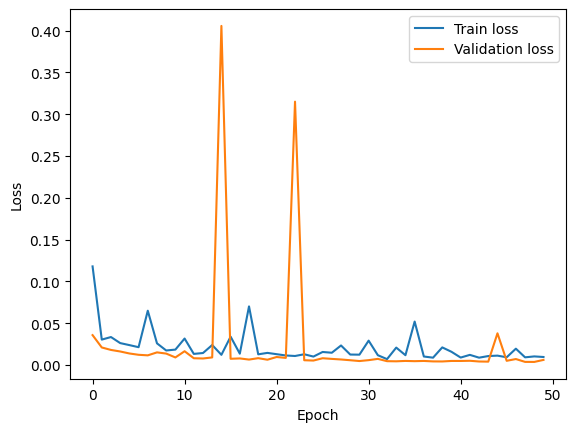

In [22]:
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show

Evaluate the model

In [24]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, model.predict(X_test_scaled))
loss = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", loss)
print("Test MSE:", mse)

3670/3670 [==============================] - 6s 2ms/step - loss: 0.0062
Test Loss: 0.006167561747133732
Test MSE: 0.0014777200007619184


Calculate MSE and R2

In [27]:
y_pred = model.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

3670/3670 [==============================] - 13s 3ms/step
Mean Squared Error (MSE): 0.0014777200007619184
R-squared (R2): 0.9994333748275344


Now we need to add the month sales

In [28]:
from functools import total_ordering
X_test['ID'] = df_test['ID']


predictions_df = pd.DataFrame({'ID': X_test['ID'], 'item_cnt_month': y_pred.flatten()})


total_sales = predictions_df.groupby('ID')['item_cnt_month'].sum().reset_index()

print(predictions_df.head())

         ID  item_cnt_month
1508896 NaN        0.989336
624931  NaN        0.994096
838749  NaN        0.988367
1371498 NaN        0.988617
1100182 NaN        0.987562


we need to create a new DataFrame with the 2 data columns

In [31]:
total_sales = total_sales.rename(columns={'item_cnt_month': 'item_cnt_month'})
print(total_sales.head())

     ID  item_cnt_month_total
0   5.0              0.991706
1   9.0              3.038932
2  11.0              0.991755
3  12.0              0.991755
4  54.0              0.992091


In [32]:
total_sales.columns = ['ID', 'item_cnt_month']
print(total_sales.head())

     ID  item_cnt_month
0   5.0        0.991706
1   9.0        3.038932
2  11.0        0.991755
3  12.0        0.991755
4  54.0        0.992091


In [34]:
print(df_test.head())


   ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233
3   3        5     5232
4   4        5     5268


In [43]:
df_test['date_block_num'] = 0
df_test['item_cnt_day'] = 0
df_test['item_price'] = 0
print(df_test.head())

   ID  shop_id  item_id  data_block_num  item_cnt_day  item_price  \
0   0        5     5037               0             0           0   
1   1        5     5320               0             0           0   
2   2        5     5233               0             0           0   
3   3        5     5232               0             0           0   
4   4        5     5268               0             0           0   

   date_block_num  
0               0  
1               0  
2               0  
3               0  
4               0  


In [44]:
X_test = df_test[['shop_id', 'item_id', 'date_block_num', 'item_cnt_day', 'item_price']]
print(X_test.head())

   shop_id  item_id  date_block_num  item_cnt_day  item_price
0        5     5037               0             0           0
1        5     5320               0             0           0
2        5     5233               0             0           0
3        5     5232               0             0           0
4        5     5268               0             0           0


In [46]:
original_features = scaler.get_feature_names_out()
print(original_features)



['date_block_num' 'shop_id' 'item_id' 'item_price' 'item_cnt_day']


In [47]:
X_test = X_test[original_features]

X_test_scaled = scaler.transform(X_test)

In [48]:
X_test_scaled = scaler.transform(X_test)


y_pred = model.predict(X_test_scaled)

df_test['item_cnt_month'] = y_pred.flatten()

predictions_df = df_test[['ID', 'item_cnt_month']]

print(predictions_df.head())

6694/6694 [==============================] - 11s 2ms/step
   ID  item_cnt_month
0   0       -0.033904
1   1       -0.034009
2   2       -0.033976
3   3       -0.033977
4   4       -0.033990


Now Download the CSV

In [49]:
predictions_df.to_csv('predictions.csv', index=False)
files.download('predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>